In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from model_tools import PenalizedRegression as pr

from time import time

from sklearn import datasets
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import pipeline
from sklearn import metrics

## Load and Split Data

In [2]:
data = datasets.load_breast_cancer(as_frame=False)
X = data["data"]
y = data["target"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.5, random_state=42)

## Data Pre-Processing

In [3]:
SS = preprocessing.StandardScaler()
SS.fit(X_train)
X_train_ss = SS.transform(X_train)
X_test_ss = SS.transform(X_test)

## Models
cv=3, since this is a small data-set

### l1

0.9940660474716203 0.9978173087416785


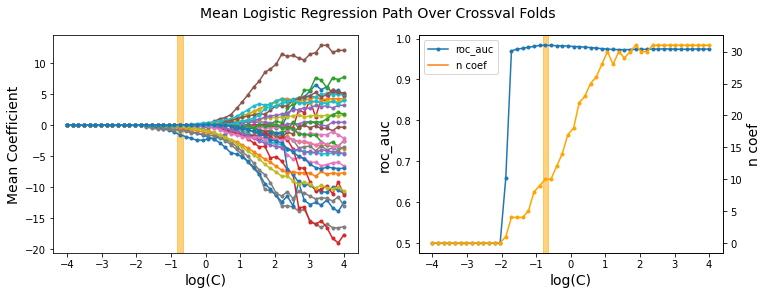

In [4]:
logistic_l1_cv = linear_model.LogisticRegressionCV(
    cv=3, Cs=50, penalty="l1", scoring="roc_auc", solver="liblinear", random_state=42, max_iter=1e4)
logistic_l1_cv.fit(X_train_ss, y_train)
print(logistic_l1_cv.score(X_train_ss, y_train), logistic_l1_cv.score(X_test_ss, y_test))
fig, (ax1, ax2) = pr.plot_logistic_cv(logistic_l1_cv, marker='.', figsize=[12,4], fontsize=14)

In [5]:
var_idx = np.where(logistic_l1_cv.coef_[0] != 0)[0]

In [6]:
logistic_l1_cv = linear_model.LogisticRegressionCV(
    cv=3, Cs=50, penalty="l1", scoring="roc_auc", solver="liblinear", random_state=42, max_iter=1e4)
logistic_l1_cv.fit(X_train_ss[:, var_idx], y_train)
print(logistic_l1_cv.score(X_train_ss[:, var_idx], y_train), logistic_l1_cv.score(X_test_ss[:, var_idx], y_test))

0.9940660474716203 0.9978173087416785


### l2

0.9936016511867906 0.9982538469933427


(<Figure size 864x288 with 2 Axes>,
 (<Axes: xlabel='log(C)', ylabel='Mean Coefficient'>,
  <Axes: xlabel='log(C)', ylabel='roc_auc'>))

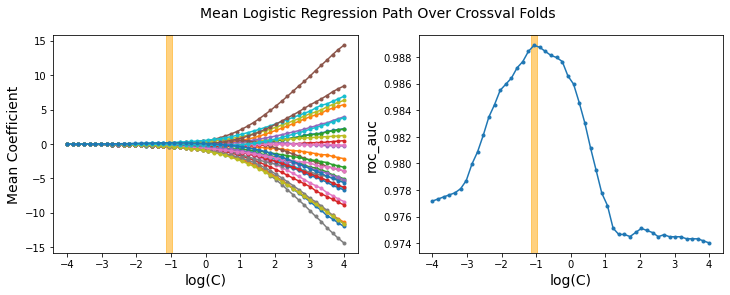

In [7]:
logistic_l2_cv = linear_model.LogisticRegressionCV(
    cv=3, Cs=50, penalty="l2", scoring="roc_auc", solver="liblinear", random_state=42, max_iter=1e4)
logistic_l2_cv.fit(X_train_ss, y_train)
print(logistic_l2_cv.score(X_train_ss, y_train), logistic_l2_cv.score(X_test_ss, y_test))
pr.plot_logistic_cv(logistic_l2_cv, marker='.', figsize=[12,4], fontsize=14)

### elastic_net

0.9929308565531476 0.9982538469933427


(<Figure size 864x288 with 4 Axes>,
 (<Axes: xlabel='l1 ratio', ylabel='roc_auc'>,
  <Axes: xlabel='log(C)', ylabel='roc_auc'>))

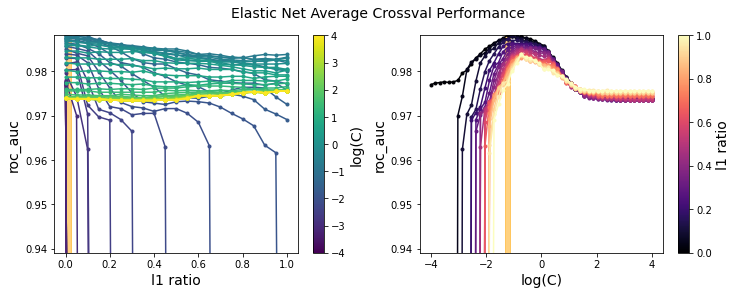

In [8]:
logistic_elnet_cv = linear_model.LogisticRegressionCV(
    cv=3, Cs=50, penalty="elasticnet", l1_ratios=np.linspace(0,1,21), scoring="roc_auc", solver="saga", random_state=42, max_iter=1e4)
logistic_elnet_cv.fit(X_train_ss, y_train)
print(logistic_elnet_cv.score(X_train_ss, y_train), logistic_elnet_cv.score(X_test_ss, y_test))
pr.plot_logistic_cv(logistic_elnet_cv, marker='.', highlight_c="orange", figsize=[12,4], fontsize=14)